# Example 1 : A Simple Denoising Case

In this example, we are going to denoise a galaxy image and visualize the result.

We first start by import the required libraries.

In [1]:
from score import score
import numpy as np
import matplotlib.pyplot as plt

# Data preparation

Then we load the data.

In [2]:
# %% load data
#true galaxies
gals = np.load('convolved_galaxies.npy')
#observed galaxies
gals_obs = np.load('observed_galaxies.npy')

# Image Selection

Afterwards, we select one of the 5 galaxy images.

In [5]:
#pick a galaxy image number (between 0 and 4, in this case)
gal_num = 2
gal = gals[gal_num]
gal_obs = gals_obs[gal_num]

# Denoising

Now we denoise the chosen galaxy image by instanciating score and using its `denoise` method.

In [6]:
# %% perform denoising of the chosen galaxy image
#initiate score
#set the value of gamma for example
denoiser = score(gamma=0.5)
#denoise
denoiser.denoise(obs=gal_obs) #the result will be in denoiser.solution

/Users/fnammour/Documents/Librairies/score/cadmos_lib.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff[s] = trafo.adjoint_transform(temp, do_norm=False)


Running restoration...
RESTORATION PROCESS DONE
Running diagnostic...
starlets generation    2.00000
beta                   0.10266
k                      4.00000
gamma                  0.50000
RIP                    0.00000
# of iterations        40.00000
total # of iterations  40.00000


# Visualizing the Result

We start by setting the parameters to the graphs. We would like to give the same colorbar scale for the observed image, the true one and the denoised one.

In [7]:
# %% plot result
vmin = np.min(gal_obs)
vmax = np.max([gal_obs,gal,denoiser.solution])
colormap = 'gist_stern'

Now we can show the images.

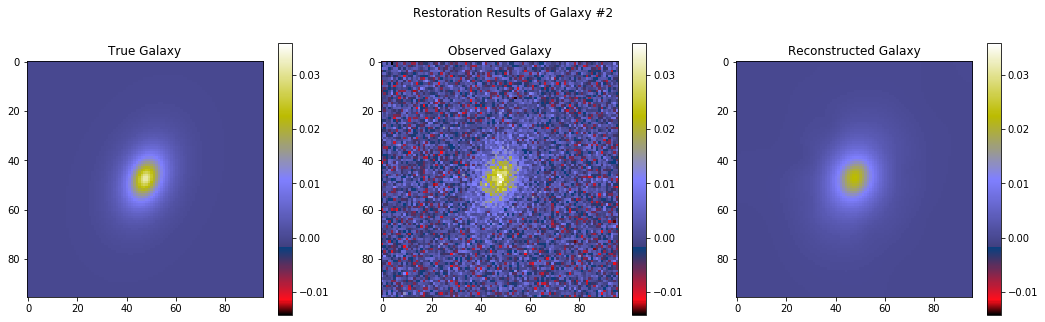

In [12]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.imshow(gal,vmin=vmin,vmax=vmax,cmap=colormap)
plt.colorbar()
plt.title('True Galaxy')

plt.subplot(132)
plt.imshow(gal_obs,vmin=vmin,vmax=vmax,cmap=colormap)
plt.colorbar()
plt.title('Observed Galaxy')

plt.subplot(133)
plt.imshow(denoiser.solution,vmin=vmin,vmax=vmax,cmap=colormap)
plt.colorbar()
plt.title('Reconstructed Galaxy')

plt.suptitle('Restoration Results of Galaxy #{}'.format(gal_num))

plt.show()